In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import sklearn

In [2]:
df_da = pd.read_csv('/home/barrage/plasticc/plasticc/ConvBERTBandSep3DCNNReguWeigthedFineTune/code/stats.csv')

df_da

,Class Name,Number of samples
0,AGNs,906
1,Variable,3225
2,SNII,2041
3,SNIa,1448
4,SpectoSNIa,540
5,SpectoSNII,89


In [3]:
classes_weigths =np.array(df_da['Number of samples'][:2])/3225
print(classes_weigths)

[0.28093023 1.        ]


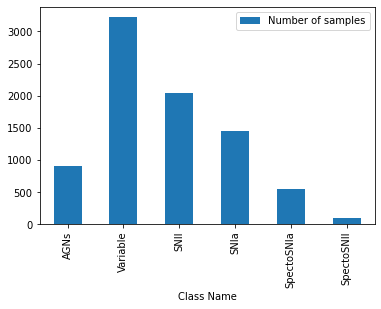

In [4]:
df_da.plot('Class Name',['Number of samples'],kind = 'bar')

In [5]:
df_da_ = pd.read_csv('/home/barrage/anass/ConvBERTSparseSDSSResultsRegulWeighted/TrainGroupsFineTune-256-08/CSVStats/stats.csv')
df_da_

,Model_Name,OAccuracy,AAccuracy,F1Score
0,Model-1-Fold-0,69.700103,0.663158,0.654303
1,Model-1-Fold-1,74.560496,0.725213,0.698768
2,Model-1-Fold-2,76.111686,0.723025,0.708451
3,Model-1-Fold-3,71.561531,0.653244,0.639777


In [6]:
df_da_= df_da_.append(pd.DataFrame.from_dict({'Model_Name':[f'AVG_Values'],
            'OAccuracy':[np.mean(df_da_['OAccuracy'])], 'AAccuracy':[np.mean(df_da_['AAccuracy'])], 'F1Score':[np.mean(df_da_['F1Score'])]}))

In [7]:
df_da_

,Model_Name,OAccuracy,AAccuracy,F1Score
0,Model-1-Fold-0,69.700103,0.663158,0.654303
1,Model-1-Fold-1,74.560496,0.725213,0.698768
2,Model-1-Fold-2,76.111686,0.723025,0.708451
3,Model-1-Fold-3,71.561531,0.653244,0.639777
0,AVG_Values,72.983454,0.691160,0.675325


In [8]:

from astropy.table import Table
import random

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    # print('This is dic ')
    # print(listOfKeys)  
    return  listOfKeys

    
def get_id_label(meta_path):
    dict_id_label = {}
    all_transients = Table.read(meta_path)
    for transient in all_transients :
        if str(transient['Classification']) == 'Unknown': continue #we exclude Unknown from our dataset 
        non_supernova =['AGN', 'Unknown', 'Variable']
        train_snII = ['pSNII', 'pSNIbc','zSNII','zSNIbc']
        train_snIa = ['pSNIa','zSNIa']
        Valid_snIa = ['SNIa?','SNIa']
        # print(str(transient['Classification']))
        if str(transient['Classification']) in non_supernova:
            dict_id_label[int(transient['CID'])] = str(transient['Classification'])
        elif str(transient['Classification']) in train_snII:
            dict_id_label[int(transient['CID'])] = 'TrainSNII'
        elif str(transient['Classification']) in train_snIa:
            dict_id_label[int(transient['CID'])] = 'TrainSNIa'
        elif str(transient['Classification']) in Valid_snIa:
            dict_id_label[int(transient['CID'])] = 'ValidSNIa'
        else :
            dict_id_label[int(transient['CID'])] = 'ValidSNII'
    # print('This is dic ')
    # print(dict_id_label)        
    return dict_id_label


ids_label_dict = get_id_label('/home/barrage/anass/sdss/master_data.fits')
AGNs = getKeysByValue(ids_label_dict,'AGN')
Variable = getKeysByValue(ids_label_dict,'Variable')
SNII = getKeysByValue(ids_label_dict,'TrainSNII')
SNIa =getKeysByValue(ids_label_dict,'TrainSNIa')
SpectoSNIa =getKeysByValue(ids_label_dict,'ValidSNIa')
SpectoSNII = getKeysByValue(ids_label_dict,'ValidSNII')
random.shuffle(AGNs)
random.shuffle(Variable)
random.shuffle(SNII)
random.shuffle(SNIa)
random.shuffle(SpectoSNIa)
random.shuffle(SpectoSNII)

AGNs.remove(13651)

Train_AGN = AGNs[:int(len(AGNs)/2)] + AGNs[:int(len(AGNs)/2)]
FineTune_AGN = AGNs[int(len(AGNs)/2):] + AGNs[int(len(AGNs)/2):]  

SSNIa = SpectoSNIa + SpectoSNIa
SSNII = SpectoSNII +SpectoSNII  +SpectoSNII 

Train_set = Train_AGN + Variable[:int(len(Variable)/2)] + SNII + SNIa + Variable[:int(len(Variable)/2)] + SNII + SNIa
FineTune_set = FineTune_AGN + Variable[int(len(Variable)/2):] + Variable[int(len(Variable)/2):] + SSNIa + SSNII



In [9]:
# ['AGN', 'SNIa', 'Variable', 'SNautre']
df_da_train = pd.DataFrame.from_dict({'Class Name':['AGNs','SNIa','Variable','SNII'], 'Number of samples for train':[len(Train_AGN),  len(SNIa), len( Variable[:int(len(Variable))]), len(SNII)]})
list_y = [0]*len(Train_AGN) +[1]*len(SNIa) +[2]*len(Variable[:int(len(Variable))]) +[3]*len(SNII) 
num_y = np.array(list_y)
print(collections.Counter(num_y)) 
class_weights=sklearn.utils.class_weight.compute_class_weight('balanced',np.unique(list_y),num_y)
print(class_weights) 


Counter({2: 3225, 3: 2041, 1: 1448, 0: 904})
[2.10674779 1.31526243 0.59054264 0.93312102]


/home/anass/anaconda3/envs/kinetics/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 ... 3 3 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [10]:
df_da_train

,Class Name,Number of samples for train
0,AGNs,904
1,SNIa,1448
2,Variable,3225
3,SNII,2041


In [11]:
classes_weigths_train =1/np.array(df_da_train['Number of samples for train'])
print(classes_weigths_train)

[0.00110619 0.00069061 0.00031008 0.00048996]


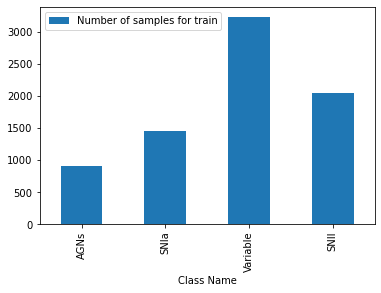

In [12]:
df_da_train.plot('Class Name',['Number of samples for train'],kind = 'bar')

In [13]:
print(sum([len(Train_AGN), len( Variable[:int(len(Variable))]), len(SNII),  len(SNIa)]))

7618


In [14]:
df_da_fine = pd.DataFrame.from_dict({'Class Name':['AGNs','SNIa','Variable','SNII'], 'Number of samples for Finetune':[len(FineTune_AGN),  len(SSNIa), len( Variable[:int(len(Variable))]), len(SSNII)]})
df_da_fine

,Class Name,Number of samples for Finetune
0,AGNs,906
1,SNIa,1080
2,Variable,3225
3,SNII,267


In [15]:
list_y = [0]*len(FineTune_AGN) +[1]*len(SSNIa) +[2]*len(Variable[:int(len(Variable))]) +[3]*len(SSNII) 
num_y = np.array(list_y)
print(collections.Counter(num_y)) 
class_weights=sklearn.utils.class_weight.compute_class_weight('balanced',np.unique(list_y),num_y)
print(class_weights) 


Counter({2: 3225, 1: 1080, 0: 906, 3: 267})
[1.5115894  1.26805556 0.42465116 5.12921348]


/home/anass/anaconda3/envs/kinetics/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 ... 3 3 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [16]:
classes_weigths_fineTune =1/np.array(df_da_fine['Number of samples for Finetune'])
print(classes_weigths_fineTune)

[0.00110375 0.00092593 0.00031008 0.00374532]


In [16]:
df_da_fine

,Class Name,Number of samples for Finetune
0,AGNs,906
1,SNIa,1080
2,Variable,3225
3,SNII,267


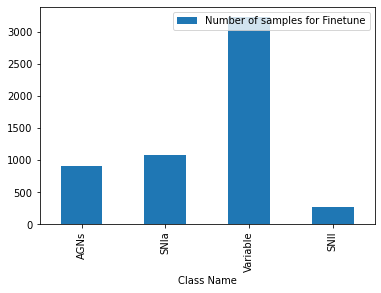

In [31]:
df_da_fine.plot('Class Name',['Number of samples for Finetune'],kind = 'bar')

In [37]:
print(sum([len(FineTune_AGN), len( Variable[:int(len(Variable)/2)]), len(SSNII),  len(SSNIa)]))

3867


In [ ]:
df_results  = pd.read_csv('/home/barrage/anass/ConvBERTSparseSDSSResultsRegulWeighted/TrainGroupsFineTune-256-08/CSVStats/stats.csv')
df_results